#Challenge 2 - Visualization of Energy Consumptions

###Soma Suzuki

Considering that Enechange is a service which offers an electricity plan to each household, I assume that the total_watt.csv data is about electricity consumption in Japanese households and proceed to a discussion.

The total_watt.csv leaves out energy consumption data between 5/3 21:52 - 5/6 13:52. This is because this period includes holidays in Japan. By excluding the data in this period, we can also exclude unexpected outliers.

In [14]:
#import module
%matplotlib inline
from matplotlib import style
from matplotlib import pylab as plt
from matplotlib import style
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import axes3d
style.use('ggplot')

##1. visualization of the data-set as values per 30mins

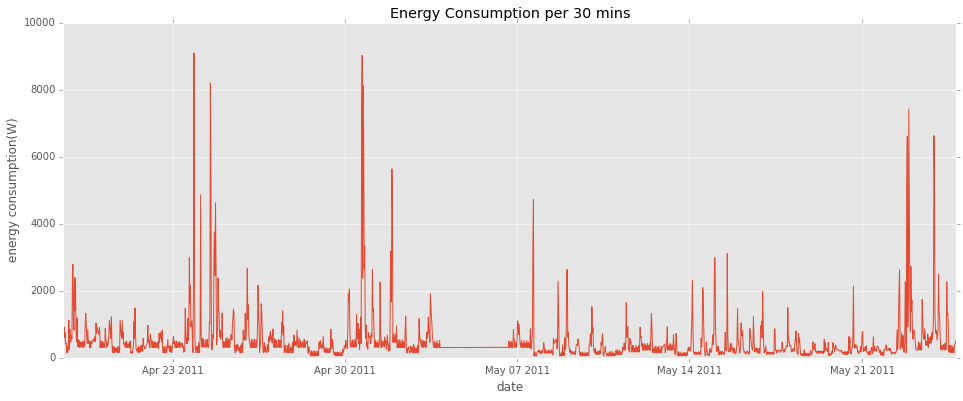

In [15]:

MY_FILE='../../data/total_watt.csv'              

date=[]
consumption=[]
                            
import csv
with open(MY_FILE, 'rb') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    for row in csvreader:
        if len(row) ==2 :
            date.append(row[0])
            consumption.append(row[1])

                                                            
import datetime
for x in range(len(date)):
    date[x]=datetime.datetime.strptime(date[x], '%Y-%m-%d %H:%M:%S')

fig = plt.subplots(figsize=(16, 6))

plt.plot(date,consumption)
                                                                            
plt.title('Energy Consumption per 30 mins')
plt.xlabel('date')
plt.ylabel('energy consumption(W)')

plt.show()



There are some particular points where electricity consumption is extremely high which may indicate the time when many people use electrical devices in their house, such as air-conditioner, lights and the TV (these three electric devices occupy 60% of electric energy consumption in Japan.). You can also check this from extra3D.jpg


##2. visualization of the data-set as values per day

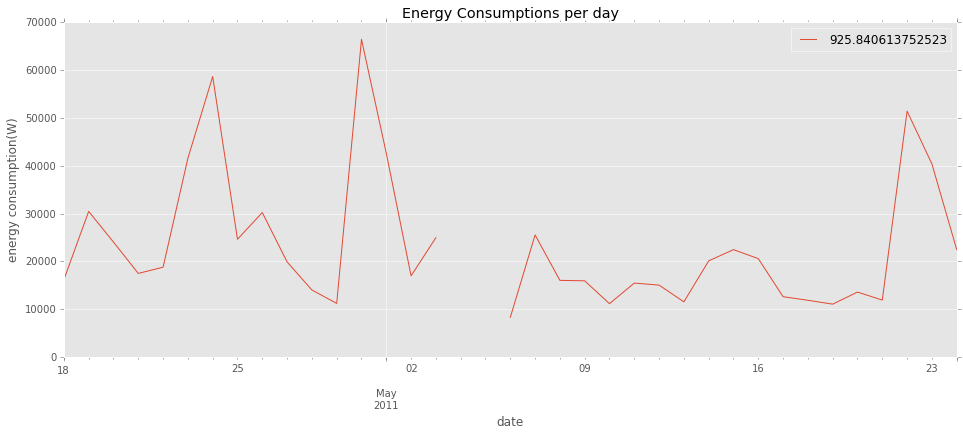

In [16]:


date2=[]
consumption2=[]


df = pd.read_csv(MY_FILE, parse_dates=[0], index_col=[0])
df = df.resample('1D', how='sum')

for row in df:
    if len(row) ==2 :
        date2.append(row[0])
        consumption2.append(row[1])

import datetime
for x in range(len(date2)):
    date2[x]=datetime.datetime.strptime(date2[x], '%Y-%m-%d %H:%M:%S')

df.plot(figsize=(16, 6))

plt.title('Energy Consumptions per day')
plt.xlabel('date')
plt.ylabel('energy consumption(W)')

plt.show()


As you can see from the graph, there are some days which electricity consumption is extremely high. By searching the day on a calender, I found that they are the day around weekends. It also suggests total_watt.csv treats energy consumption in households, not in companies as corporation offices are usually closed on weekends.  You can also find a less varied jagged pattern in the graph, which shows normal workdays of the week, although I cannot find particular pattern for each day of the week. You can also check this from extra3D.jpg

## 3.visualization of the data-set as clusters

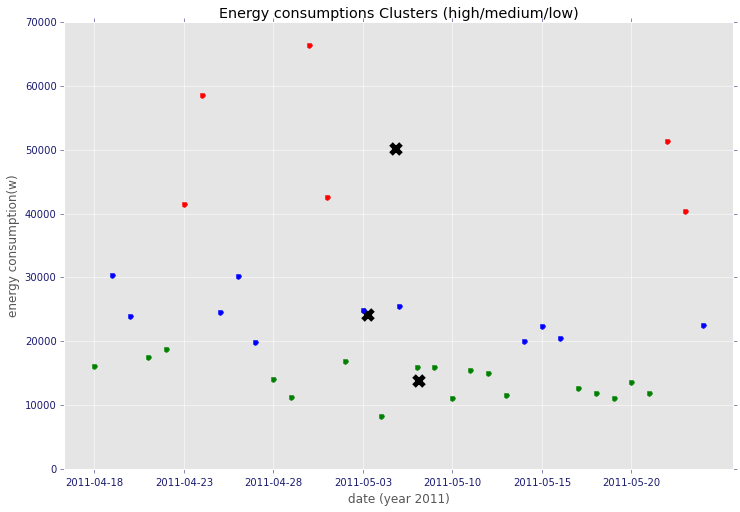

In [17]:
date3 = []
consumption3 = []

df = pd.read_csv(MY_FILE, parse_dates=[0], index_col=[0])
df = df.resample('1D', how='sum')
df = df.dropna()

date3 = df.index.tolist()
date3 = [x.strftime('%Y-%m-%d') for x in date3]
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
date_numeric = encoder.fit_transform(date3)
consumption3 = df[df.columns[0]].values

X = np.array([date_numeric, consumption3]).T

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_


fig, ax = plt.subplots(figsize=(12,8))



colors = ["b.","r.","g."]

for i in range(len(X)):
    ax.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
a = np.arange(0, len(X), 5)
ax.set_xticks(a)
ax.set_xticklabels(encoder.inverse_transform(a.astype(int)))
ax.tick_params(axis='x', colors='midnightblue')
ax.tick_params(axis='y', colors='midnightblue')
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=100, c="black", linewidths = 5)
ax.set_title('Energy consumptions Clusters (high/medium/low)')
ax.set_xlabel('date (year 2011)')
ax.set_ylabel('energy consumption(w)')


In this chart, the data is clustered in three groups (high, medium and low) using the kmeans algorithm. X-marks in the graph shows centroids of each cluster.

## What gragh is the most useful for consumer?

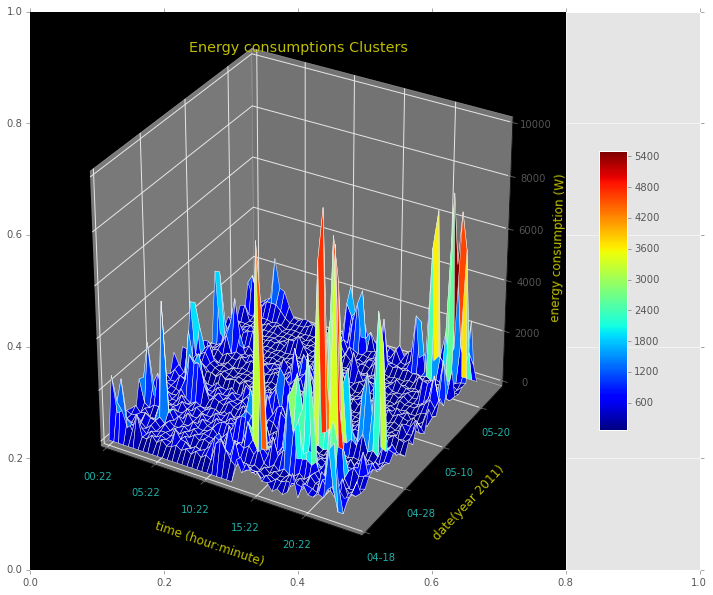

In [18]:

df = pd.read_csv(MY_FILE, parse_dates=[0], header=None, names=['datetime', 'consumption'])

df['date'] = [x.date() for x in df['datetime']] 
df['time'] = [x.time() for x in df['datetime']] 

pv = df.pivot(index='time', columns='date', values='consumption')

# to avoid holes in the surface
pv = pv.fillna(0.0)

xx, yy = np.mgrid[0:len(pv),0:len(pv.columns)]


fig, ax = plt.subplots(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')


surf=ax.plot_surface(xx, yy, pv.values, cmap='jet', cstride=1, rstride=1)
fig.colorbar(surf, shrink=0.5, aspect=10)

dates = [x.strftime('%m-%d') for x in pv.columns]
times = [x.strftime('%H:%M') for x in pv.index]


ax.set_title('Energy consumptions Clusters', color='y')
ax.set_xlabel('time (hour:minute)', color='y')
ax.set_ylabel('date(year 2011)', color='y')
ax.set_zlabel('energy consumption (W)', color='y')

ax.set_xticks(xx[::10,0])
ax.set_xticklabels(times[::10], color='lightseagreen')
ax.set_yticks(yy[0,::10])
ax.set_yticklabels(dates[::10], color='lightseagreen')

ax.set_axis_bgcolor('black')

plt.show()


This is just a extra for this assignment.
As you can see rom this graph, people don’t consume much energy from 04:22 to 10:22, which also suggests total_watt.csv treats energy consumption in households, not in company.
Although you can not handle this 3D graph in ipython notebook, when you implement an above code in Terminal, you can rotate and zoom the graph and it is much easier to see.

###Thanks for reading! Looking forward to the Skype Interview!!